In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import os, sys
sys.path.append(os.path.abspath("../src"))

In [2]:
!pip install opencv-python

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from keras.layers import (
    Dense, Conv2D, Conv2DTranspose, Flatten, MaxPool2D, Reshape
)
from keras.models import Model, Input

Using TensorFlow backend.


In [4]:
import itertools as it
from keras.preprocessing.image import load_img
from PIL import Image

# Loading an preprocessing

In [5]:
def iterate_lfw(path):
    for root, _, files in os.walk(path):
        for file in files:
            if os.path.splitext(file)[-1] != ".jpg":
                continue
            yield os.path.join(root, file)
            
def load_and_preprocess(img_path):
    img = load_img(img_path)
    img = np.array(img)
    img = img[61:189, 61:189]
    img = Image.fromarray(img)
    return np.array(img.resize((64, 64)))



In [6]:
images = [
    load_and_preprocess(path)
    for path in it.islice(iterate_lfw("data/lfw-deepfunneled/"), 5000)
]

images = np.array(images)
np.random.shuffle(images)
images = (images.astype(np.float32) - 128.0) / 128

# Model

In [23]:
from keras.layers import LeakyReLU

In [27]:
def create_discriminator(input_dim):
    inputs = Input(shape=input_dim)
    hidden_state = Conv2D(32, (3,3), padding="same", activation=LeakyReLU())(inputs)
    hidden_state = Conv2D(32, (3, 3), padding="same", activation=LeakyReLU())(hidden_state)
    hidden_state = MaxPool2D(2)(hidden_state)
    hidden_state = Conv2D(32, (3,3), padding="same", activation=LeakyReLU())(hidden_state)
    hidden_state = Conv2D(32, (3, 3), padding="same", activation=LeakyReLU())(hidden_state)
    hidden_state = MaxPool2D(2)(hidden_state)
    hidden_state = Conv2D(32, (3,3), padding="same", activation=LeakyReLU())(hidden_state)
    hidden_state = Conv2D(32, (3, 3), padding="same", activation=LeakyReLU())(hidden_state)
    hidden_state = MaxPool2D(2)(hidden_state)
    hidden_state = Conv2D(32, (3,3), padding="same", activation=LeakyReLU())(hidden_state)
    hidden_state = Conv2D(16, (3, 3), padding="same", activation=LeakyReLU())(hidden_state)
    hidden_state = MaxPool2D(4)(hidden_state)
    hidden_state = Flatten()(hidden_state)
    hidden_state = Dense(100)(hidden_state)
    outputs = Dense(1, activation="sigmoid")(hidden_state)
    return Model(inputs, outputs)

def create_generator(noise_dim):
    inputs = Input(shape=(noise_dim,))
    hidden_state = Dense(128, activation=LeakyReLU())(inputs)
    hidden_state = Reshape((8, 8, 2))(hidden_state)
    hidden_state = Conv2DTranspose(
        32, (3, 3), strides=2, padding="same", activation=LeakyReLU()
    )(hidden_state)
    hidden_state = Conv2D(
        32, (3, 3), padding="same", activation=LeakyReLU()
    )(hidden_state)
    hidden_state = Conv2D(
        32, (3, 3), padding="same", activation=LeakyReLU()
    )(hidden_state)
    hidden_state = Conv2DTranspose(
        32, (3, 3), strides=2, padding="same", activation=LeakyReLU()
    )(hidden_state)
    hidden_state = Conv2D(
        32, (3, 3), padding="same", activation=LeakyReLU()
    )(hidden_state)
    hidden_state = Conv2D(
        32, (3, 3), padding="same", activation=LeakyReLU()
    )(hidden_state)
    hidden_state = Conv2DTranspose(
        32, (3, 3), strides=2, padding="same", activation=LeakyReLU()
    )(hidden_state)
    hidden_state = Conv2D(
        32, (3, 3), padding="same", activation=LeakyReLU()
    )(hidden_state)
    hidden_state = Conv2D(
        32, (3, 3), padding="same", activation=LeakyReLU()
    )(hidden_state)
    outputs = Conv2D(3, (3, 3), padding="same", activation="tanh")(hidden_state)
    return Model(inputs, outputs)

In [28]:
from gan import GAN

In [29]:
gan = GAN(create_discriminator_func=create_discriminator,
          create_generator_func=create_generator,
          noise_dim=128,
          input_dim=(64,64,3))

/usr/local/lib/python3.5/dist-packages/keras/activations.py:197: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
reshape_3 (Reshape)          (None, 8, 8, 2)           0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 16, 16, 32)        608       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 32, 32, 32)        9248      
__________

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2.0458195,0.2882682, 0.13691907,0.90594953
2.033502,0.6526269, 0.0010016026,0.8967348
2.5215733,0.22262265, 0.012620192,0.95002
2.0650735,0.22039032, 0.01923077,0.9333934
2.5623267,0.30065814, 0.010616987,0.91225964


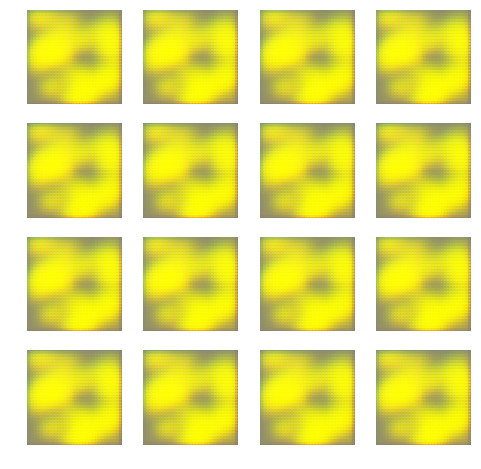

2.5569131,0.3829499, 0.009114583,0.8327324
0.9831572,0.55135685, 0.11288061,0.7545072
1.7394986,0.29426757, 0.024439102,0.9072516
3.3781025,0.12904994, 0.0037059295,0.9660457
4.7004213,0.21938351, 0.01552484,0.9363982


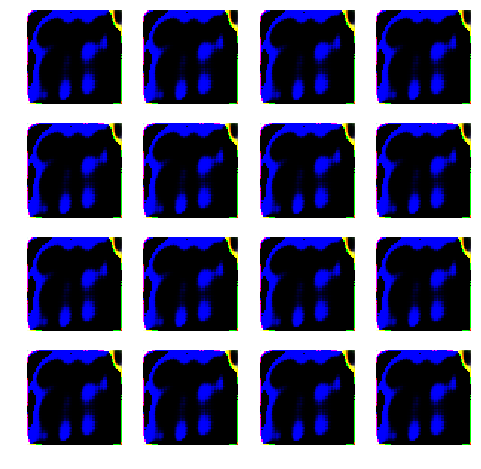

5.901911,0.008134061, 0.0,0.9992989
6.8179626,0.0028152487, 0.0,0.99979967
6.0476995,0.037697274, 0.00060096156,0.9891827
5.826045,0.118935466, 0.0048076925,0.96864986
4.978175,0.024062209, 0.0,0.9936899


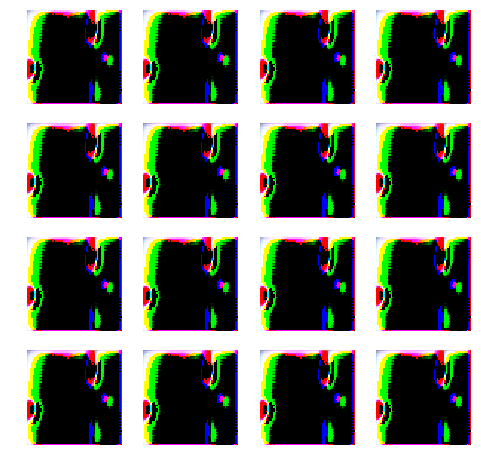

5.549712,0.014818645, 0.0,0.9953926
2.1894705,0.35745388, 0.028545674,0.8687901
2.8140886,0.22677688, 0.030148238,0.91376203
2.358914,0.29749504, 0.060096152,0.8823117
2.714639,0.27830797, 0.057491988,0.88982373


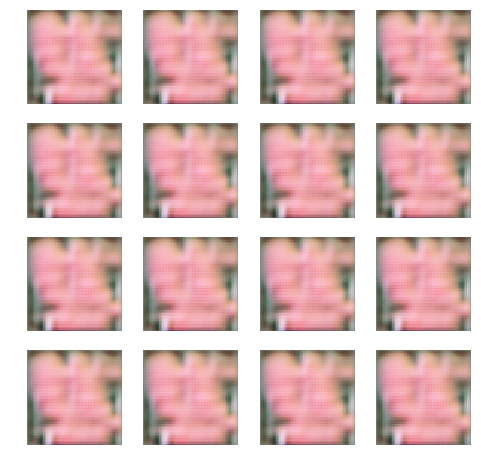

2.4105093,0.22922257, 0.057692308,0.9180689
2.382558,0.2761967, 0.0703125,0.8933293
2.382926,0.26895025, 0.06710737,0.89453125
2.6922271,0.23557293, 0.041065704,0.9176683
3.102957,0.19674101, 0.02373798,0.93659854


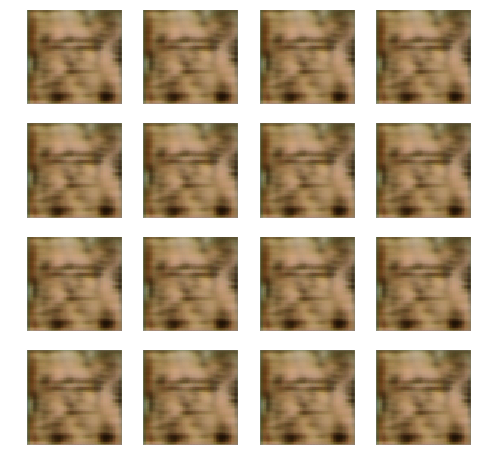

3.1211698,0.20567094, 0.030849358,0.9258814
2.932933,0.22362511, 0.04336939,0.91446316
2.6148198,0.32718882, 0.07612179,0.86248
2.4128554,0.34777108, 0.079527244,0.8494591
2.270382,0.35072598, 0.070112176,0.85236377


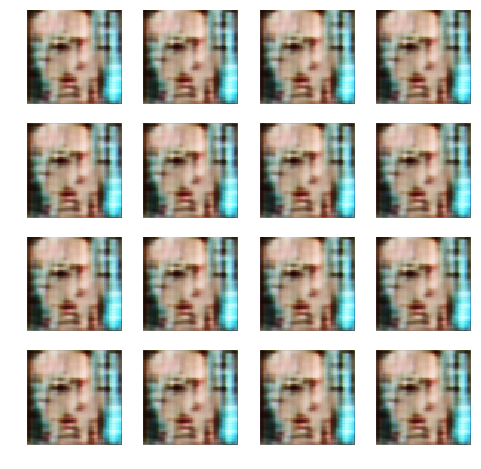

2.2146983,0.34170607, 0.06560497,0.8634816


KeyboardInterrupt: 

In [30]:
for i in range(40):
    gan.train(images, 5, 128)
    pr = gan.generator.predict(np.random.normal(size=(16,128)))
    plt.figure(figsize=(8, 8))
    for j in range(16):
        plt.subplot(4, 4, j+1)
        plt.imshow(((pr[i] * 128) + 128).astype(np.uint8))
        plt.axis("off")
    plt.show()

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2.2940187,0.36325, 0.053185098,0.8448518
2.3827872,0.34522554, 0.05018029,0.856871
2.5332627,0.34601352, 0.051582534,0.85757214
2.4131129,0.35119393, 0.04647436,0.85236377
2.593144,0.33440563, 0.049479168,0.8651843


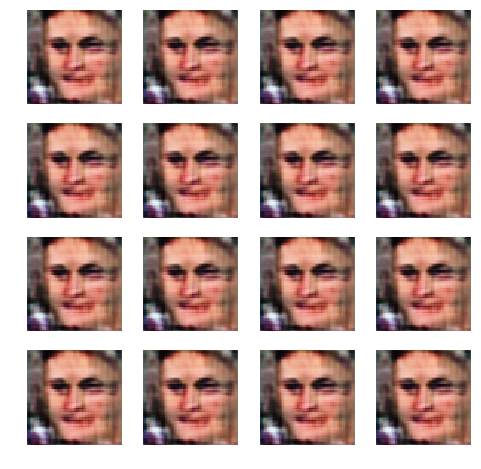

KeyboardInterrupt: 

In [31]:
noise = np.random.normal(size=(16,128))
for i in range(40):
    gan.train(images, 5, 128)
    pr = gan.generator.predict(noise)
    plt.figure(figsize=(8, 8))
    for j in range(16):
        plt.subplot(4, 4, j+1)
        plt.imshow(((pr[j] * 128) + 128).astype(np.uint8))
        plt.axis("off")
    plt.show()

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2.2998946,0.36903605, 0.053986378,0.8454527
2.280165,0.3598412, 0.059495192,0.85386616
2.3056715,0.34155622, 0.04627404,0.8588742
2.328652,0.35322663, 0.048677884,0.8551683
2.1677513,0.37337667, 0.053986378,0.8422476


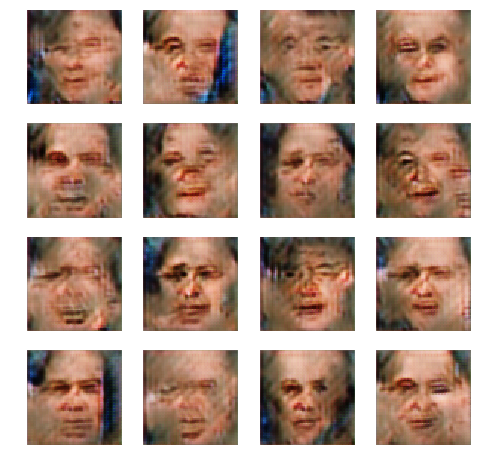

2.3277023,0.3516329, 0.048577726,0.85546875
1.9810107,0.4188252, 0.072415866,0.81590545
2.2728252,0.385106, 0.069310896,0.83303285
2.2499206,0.3885594, 0.056590546,0.8318309
2.044129,0.41775116, 0.06440304,0.815605


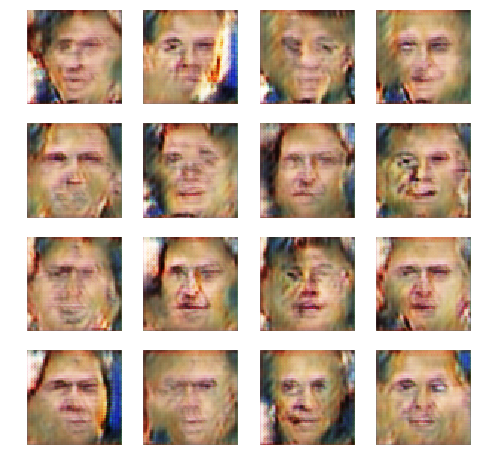

2.131017,0.38656664, 0.05799279,0.8323317
2.1266081,0.38720804, 0.06370192,0.83353364
3.1297586,0.27462685, 0.028245192,0.8876202
2.1241763,0.3620033, 0.055789262,0.84925884
2.158706,0.38711587, 0.072916664,0.8308293


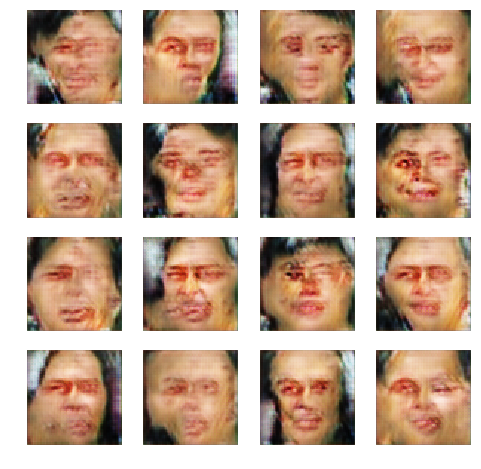

2.1292672,0.37603405, 0.060997598,0.83834136
2.14633,0.3659249, 0.07071314,0.84385014
2.1053216,0.39817557, 0.08203125,0.82061297
2.171648,0.38633716, 0.07141426,0.83784056
2.030504,0.3853803, 0.06650641,0.8415465


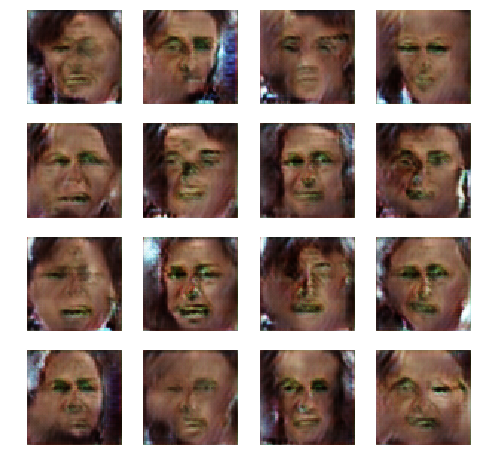

2.2745268,0.35854915, 0.058493588,0.84465146
2.1632109,0.3765066, 0.074018426,0.83583736


In [ ]:
noise = np.random.normal(size=(16,128))
for i in range(40):
    gan.train(images, 5, 128)
    pr = gan.generator.predict(noise)
    plt.figure(figsize=(8, 8))
    for j in range(16):
        plt.subplot(4, 4, j+1)
        plt.imshow(((pr[j] * 128) + 128).astype(np.uint8))
        plt.axis("off")
    plt.show()